In [38]:
import numpy as np
import scipy as sp
from importlib import reload
import neuraltda.topology2 as tp2
import glob
import os
import pickle
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['LiberationSans']
import matplotlib.pyplot as plt
import h5py as h5
%matplotlib inline

import seaborn as sns
import pandas as pd
from neuraltda import TPLCP
from neuraltda import FRLCP
reload(TPLCP)

import datetime
daystr = datetime.datetime.now().strftime('%Y%m%d')
figsavepth = '/home/brad/DailyLog/'+daystr+'/'
print(figsavepth)



/home/brad/DailyLog/20180123/


In [32]:
import matplotlib
matplotlib.font_manager.findSystemFonts()

['/usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/tlwg/Sawasdee-Oblique.ttf',
 '/usr/share/fonts/opentype/stix-word/STIX-Regular.otf',
 '/usr/share/fonts/truetype/tlwg/Norasi-BoldItalic.ttf',
 '/usr/share/fonts/truetype/ubuntu-font-family/UbuntuMono-R.ttf',
 '/usr/share/fonts/truetype/gentium-basic/GenBasB.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Oblique.ttf',
 '/usr/share/fonts/truetype/gentium-basic/GenBkBasBI.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf',
 '/usr/share/fonts/truetype/ubuntu-font-family/UbuntuMono-BI.ttf',
 '/usr/share/fonts/truetype/tlwg/Purisa-Oblique.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypist.ttf',
 '/usr/share/fonts/truetype/ubuntu-font-family/Ubuntu-MI.ttf',
 '/usr/share/fonts/opentype/stix/STIXIntegralsSm-Bold.otf',
 '/usr/share/fonts/opentype/stix/STIXIntegralsD-Regular.otf',
 '/usr/share/fonts/truetype/liberation/

In [2]:
block_path = '/home/brad/krista/B1075/P01S03/'
block_path = '/home/brad/krista/B1083/P03S03/'
bdf = glob.glob('/home/brad/krista/B1083/P03S03/binned_data/win-10.0_dtovr-5.0_seg-0-0-fulltrial/20170626T223014Z-10.0-5.0.binned')[0]

birds = ['B1083','B1056','B1075', 'B1235','B1075']
#birds = ['B1075']

bps = {'B1083': '/home/brad/krista/B1083/P03S03/', 'B1075': '/home/brad/krista/B1075/P01S03/',
       'B1235': '/home/brad/krista/B1235/P02S01/', 'B1056': '/home/brad/krista/B1056/klusta/phy020516/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'}

# Stim classes
B1083_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1075_classes = {'E_40k': 'R', 'F_40k':'L', 'G_40k':'R', 'H_40k':'L'}
B1087_classes = {'M_40k': 'R', 'N_40k':'L', 'O_40k':'R', 'P_40k':'L'}
B1235_classes = {'E_scaled_burung': 'R', 'F_scaled_burung':'L', 'G_scaled_burung':'R', 'H_scaled_burung':'L'}
B1056_classes = {'A_scaled_burung': 'R', 'B_scaled_burung':'L', 'C_scaled_burung':'R', 'D_scaled_burung':'L'}

stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1083_stims = ['M_40k', 'N_40k', 'O_40k', 'P_40k']
B1075_stims = ['E_40k', 'F_40k', 'G_40k', 'H_40k']
B1235_stims = ['E_scaled_burung', 'F_scaled_burung', 'G_scaled_burung', 'H_scaled_burung']
B1056_stims = ['A_scaled_burung', 'B_scaled_burung', 'C_scaled_burung', 'D_scaled_burung']

stim_classes = {'B1083': B1083_classes, 'B1075': B1075_classes,
                'B1235': B1235_classes, 'B1056': B1056_classes}
bird_stims = {'B1083': B1083_stims, 'B1075': B1075_stims,
              'B1235': B1235_stims, 'B1056': B1056_stims}

In [3]:
# parameters
reload(tp2)
analysis_id = 'test2'
thresh = 4.0
nperms = 20

ncellsperm = 30
dims = [0,1,2,3,4]
Ntimes = 10
twin = np.linspace(0, 6000, Ntimes)
p_test = 0.2
N_tests = 60
winsize = 10.0
dtovr = winsize*0.5
comment = 'ForLogisticPred'
segment_info = [0,0]


In [4]:
datapth = '/home/brad/DailyLog/20180123'

with open(os.path.join(datapth, 'acframe_behavioralclass.pkl'), 'rb') as f:
    acframe_behavioralclass = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_stimulusID_8stims.pkl'), 'rb') as f:
    acframe_stimulusID = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_arbunf.pkl'), 'rb') as f:
    acframe_arbunf = pickle.load(f)
    
with open(os.path.join(datapth, 'acframe_FR.pkl'), 'rb') as f:
    acframe_FR = pickle.load(f)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180123/10.0-5.0-4.0-20-30-10-0.2-60-ShuffleClassLabels-stripplot.eps


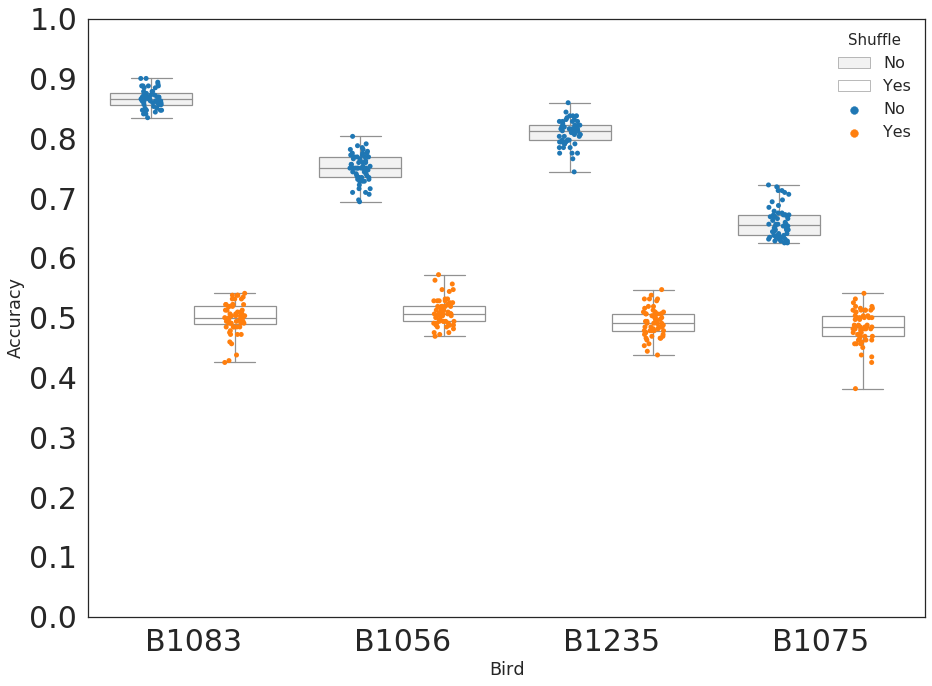

In [40]:
# Behavioral class decoder accuracy:  Real vs shuffled. stripplot
name = 'ShuffleClassLabels-stripplot'
sns.set_context('poster', rc={'font.sans-serif': 'Liberation Sans'})
sns.set_style('white')
plt.figure(figsize = (15,11))
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass,
              jitter=True, split=True)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_behavioralclass, color='white',
            linewidth=1.25, whis=100)
plt.plot()

plt.yticks([x/10 for x in range(11)])
ax = plt.gca()
ax.tick_params(labelsize=30)
#plt.ylim([0.3, 1])
figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180123/10.0-5.0-4.0-20-30-10-0.2-60-PredictStimID8Stims-stripplot.eps


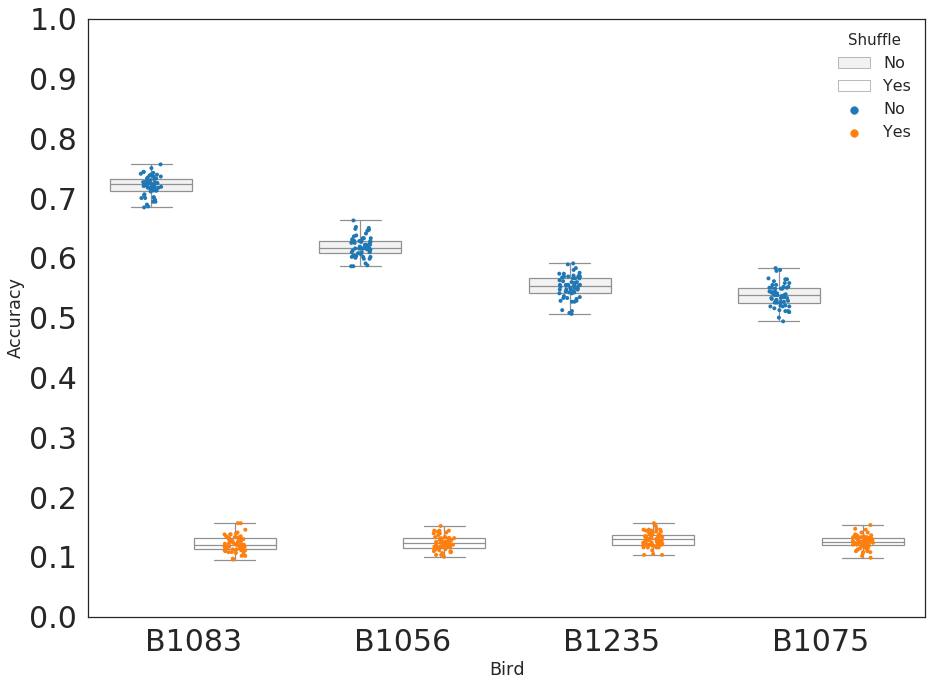

In [18]:
#stripplot
name = 'PredictStimID8Stims-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID,
              jitter=True, split=True, size=4)
sns.boxplot(x='Bird', y='Accuracy', hue='Shuffle', data=acframe_stimulusID, color='white',
            linewidth=1.25, whis=100)
plt.plot()

ax = plt.gca()
ax.tick_params(labelsize=30)

plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

/home/brad/DailyLog/20180123/10.0-5.0-4.0-20-30-10-0.2-60-UnfvFam-stripplot.eps


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


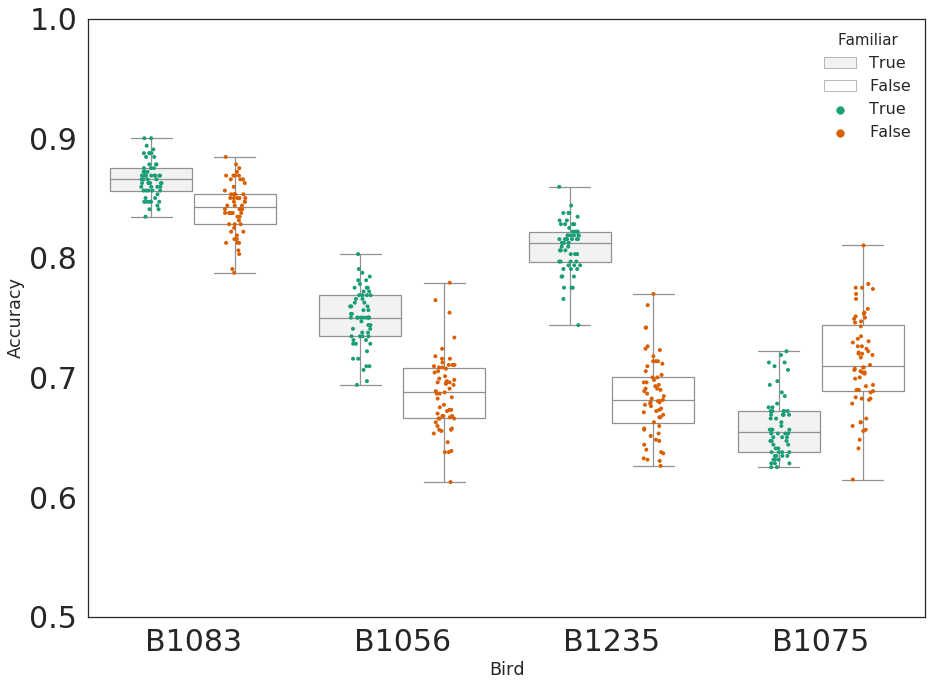

In [7]:
#stripplot

# plot familiar vs. unfamiliar
acframe_arbunf['Familiar'] = len(acframe_arbunf)*[False]
acframe_behavioralclass['Familiar'] = len(acframe_behavioralclass)*[True]

acframe_fam_unf = acframe_arbunf.append(acframe_behavioralclass)
name = 'UnfvFam-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'],
              jitter=True, split=True, size=4, palette="Dark2", hue_order=[True, False])
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf[acframe_fam_unf['Shuffle']=='No'], color='white',
            linewidth=1.25, whis=100, hue_order=[True, False])
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

In [8]:
acframe_FRTop = acframe_fam_unf[(acframe_fam_unf['Familiar']==True) & (acframe_fam_unf['Shuffle'] == 'No')]
acframe_FRTop['Type'] = pd.Series(len(acframe_FRTop)*['Top'], index=acframe_FRTop.index)
acframe_FRTop = acframe_FRTop.append(acframe_FR[acframe_FR['Shuffle'] == 'No'])

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180123/10.0-5.0-4.0-20-30-10-0.2-60-FRvsTop-stripplot.eps


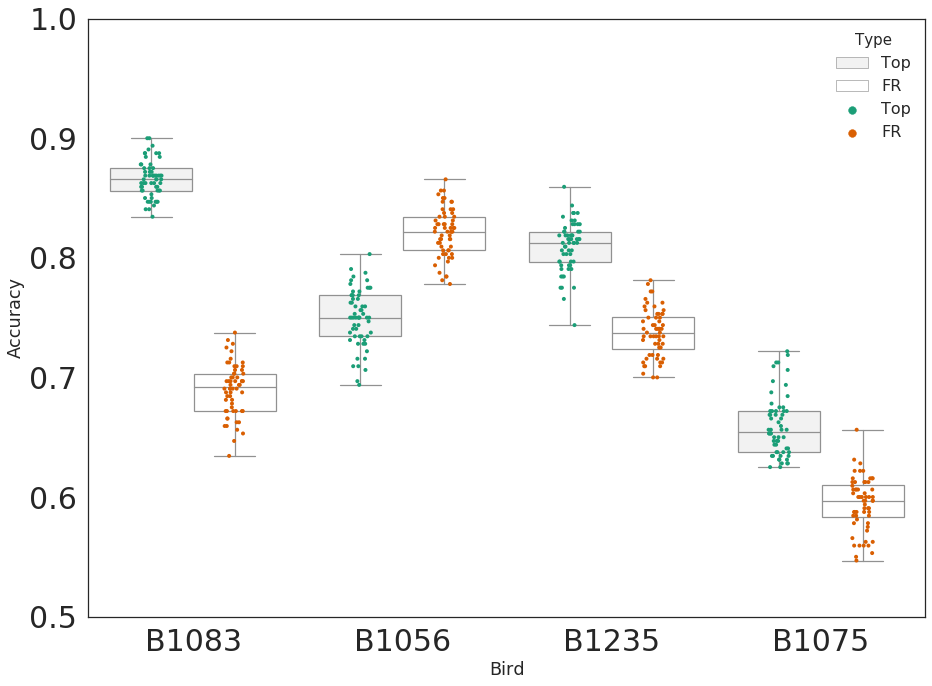

In [10]:
#stripplot
name = 'FRvsTop-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop,
              jitter=True, split=True, size=4, palette="Dark2")
sns.boxplot(x='Bird', y='Accuracy', hue='Type', data=acframe_FRTop, color='white',
            linewidth=1.25, whis=100)
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

/home/brad/.conda/envs/neuraltda-4/lib/python3.6/site-packages/seaborn/categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


/home/brad/DailyLog/20180123/10.0-5.0-4.0-20-30-10-0.2-60-UnfvFamvFR-stripplot.eps


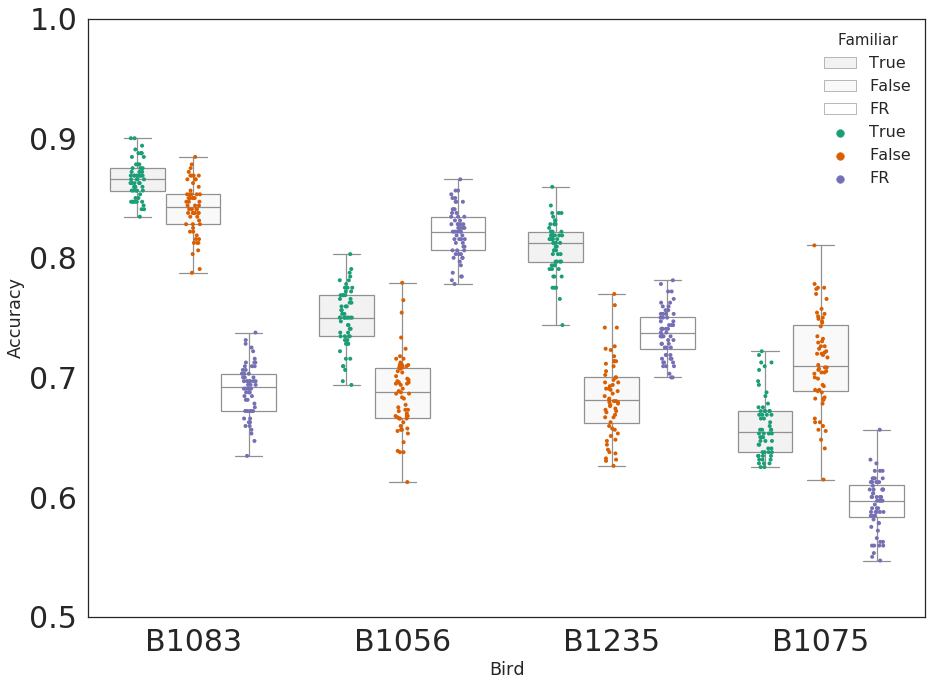

In [16]:
# Plot all of Familiar/unfamiliar/fr/shuffle
acframe_FR['Familiar'] = len(acframe_FR)*['FR']
acframe_fam_unf_FR = acframe_fam_unf.append(acframe_FR)
name = 'UnfvFamvFR-stripplot'
sns.set_context('poster')
sns.set_style('white')
plt.figure()
plt.figure(figsize=(15, 11))
sns.stripplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf_FR[acframe_fam_unf_FR['Shuffle']=='No'],
              jitter=True, split=True, size=4, palette="Dark2", hue_order=[True, False, 'FR'])
sns.boxplot(x='Bird', y='Accuracy', hue='Familiar', data=acframe_fam_unf_FR[acframe_fam_unf_FR['Shuffle']=='No'], color='white',
            linewidth=1.25, whis=100, hue_order=[True, False, 'FR'])
plt.ylim([0.5, 1.0])
plt.plot()
ax = plt.gca()
ax.tick_params(labelsize=30)

#plt.yticks([x/10 for x in range(11)])
#plt.ylim([0.3, 1])
#plt.savefig('/home/brad/DailyLog/20170831/{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))

figpath = os.path.join(figsavepth, '{}-{}-{}-{}-{}-{}-{}-{}-{}.eps'.format(winsize, dtovr, thresh, nperms, ncellsperm, Ntimes, p_test, N_tests, name))
print(figpath)
plt.savefig(figpath)

In [15]:
acframe_fam_unf_FR

,Accuracy,Bird,Familiar,Shuffle,Type
0,0.868750,B1083,False,No,NaN
1,0.868750,B1083,False,No,NaN
2,0.834375,B1083,False,No,NaN
3,0.843750,B1083,False,No,NaN
4,0.787500,B1083,False,No,NaN
5,0.862500,B1083,False,No,NaN
6,0.837500,B1083,False,No,NaN
7,0.825000,B1083,False,No,NaN
8,0.812500,B1083,False,No,NaN
9,0.837500,B1083,False,No,NaN
